# PIP and package Installation

In [ ]:
!pip install --upgrade s3fs
!pip install --upgrade urllib3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# You might need to install some packages before the actual Vectice Package installation as the build doesn't have a good wheel
!pip install -q python-dotenv gql Deprecated requests_toolbelt
!pip install s3fs
!pip install --upgrade setuptools
!pip install -q mypy_boto3_s3 boto3
!pip install --upgrade requests urllib3

# You need to replace the version with the version you want to install from the artfiact registry
!pip install -i https://test.pypi.org/simple/ vectice==22.4.9.0b4

     |████████████████████████████████| 65 kB 2.4 MB/s 
     |████████████████████████████████| 54 kB 2.8 MB/s 
     |████████████████████████████████| 202 kB 30.0 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.1.5 requires typing-extensions<4.2.0,>=3.7.4.1; python_version < "3.8", but you have typing-extensions 4.4.0 which is incompatible.
spacy 3.4.3 requires typing-extensions<4.2.0,>=3.7.4; python_version < "3.8", but you have typing-extensions 4.4.0 which is incompatible.
confection 0.0.3 requires typing-extensions<4.2.0,>=3.7.4.1; python_version < "3.8", but you have typing-extensions 4.4.0 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 65 kB 2.4 MB/s 
     |████████████████████████████████| 9.1 MB 38.9 MB/s 
     |█████████████

     |████████████████████████████████| 92 kB 404 kB/s 
     |████████████████████████████████| 132 kB 28.0 MB/s 
     |████████████████████████████████| 9.9 MB 48.7 MB/s 
     |████████████████████████████████| 79 kB 8.4 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
aiobotocore 2.4.0 requires botocore<1.27.60,>=1.27.59, but you have botocore 1.29.15 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.2 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflic

In [ ]:
!pip show vectice

Name: vectice
Version: 22.4.9.0b2
Summary: Vectice Python library
Home-page: https://www.vectice.com
Author: Vectice Inc.
Author-email: sdk@vectice.com
License: Apache License 2.0
Location: /usr/local/lib/python3.7/dist-packages
Requires: urllib3, requests, gql, python-dotenv, Deprecated
Required-by: 


In [ ]:
import vectice
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Importing the relevant libraries
import IPython.display
import seaborn as sns
from sklearn.model_selection import train_test_split 
%matplotlib inline

# import missingno as msno
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from matplotlib import pyplot as plt
import os

#import setup packages
import logging
import json

logging.basicConfig(level=logging.INFO)
# D3 modules
from IPython.core.display import display, HTML, Javascript
from string import Template
import datetime
from datetime import timedelta

from math import sqrt
# Load scikit-learn packages
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [ ]:
from sklearn import datasets
import numpy as np
import pandas as pd

# vectice comes from the "import vectice"
import vectice
from vectice import FileDataWrapper, DatasetSourceUsage

# Vectice notebook configuration

In [ ]:
import vectice
from vectice import FileDataWrapper, DatasetSourceUsage

In [ ]:
retail_ws = vectice.connect(config=r"API_token.json")

2022/11/18 17:12:17 INFO vectice.connection: Vectice successfully connected.
2022/11/18 17:12:17 INFO vectice.connection: Your current workspace: Retail Ops


In [ ]:
retail_project = retail_ws.project(project=".forecast in store unit sales")

2022/11/18 17:12:32 INFO vectice.models.workspace: Your current project: 65


In [ ]:
# Get the phase for Data Understanding 
Modeling = retail_project.phase("Modeling")

2022/11/18 17:13:19 INFO vectice.models.project: Phase with id: 294 successfully retrieved.


In [ ]:
# Iteration setup
iter = Modeling.iteration

2022/11/18 17:16:34 INFO vectice.models.phase: Iteration with id: 32 successfully retrieved.


# Linear Regression

In [ ]:
#read the dataset
df =pd.read_csv("r4modeling.csv")

#record the dataset usafe to Vectice
r4m_file_wrapped = FileDataWrapper(path="r4modeling.csv", name="Ready4modeling")
retail_project.origin_dataset = r4m_file_wrapped

## Select modeling Techniques

In [ ]:
# Get the Collect Initial Data step
step = iter.step("Select Modeling Techniques")

2022/11/18 17:18:56 INFO vectice.models.iteration: Step with id: 103 successfully retrieved.


In [ ]:
step.close(message="Following Shyam Iteration, we decide to create an improved Linear regression Model with fewer parameters.")

2022/11/18 17:16:43 INFO vectice.models.step: Select Modeling Techniques was successfully closed.


##Generate Test Design

In [ ]:
# Get the currently active iteration
iter = Modeling.iteration

2022/11/18 17:17:17 INFO vectice.models.phase: Iteration with id: 32 successfully retrieved.


In [ ]:
test_size = 0.20
# We will set the random seed so we always generate the same split.
random_state = 42

train, test = train_test_split(cleaned_data, test_size = test_size, random_state = random_state)


# Generate X_train, X_test, y_train, y_test, which we will need for modeling
X = cleaned_data.drop(['unit_sales'], axis=1)
y = cleaned_data["unit_sales"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

In [ ]:
# Get the Collect Initial Data step
step = iter.step("Generate Test Design")

2022/11/18 17:17:18 INFO vectice.models.iteration: Step with id: 104 successfully retrieved.


In [ ]:
step.close(message="With our improved linear regression we expect better results on the RSME and the MAE as some tuning has been done and this is not a row linear regression anymore")

2022/11/18 17:17:21 INFO vectice.models.step: Generate Test Design was successfully closed.


## Build Model

In [ ]:
# Get the currently active iteration
iter = Modeling.iteration

2022/11/18 17:19:14 INFO vectice.models.phase: Iteration with id: 32 successfully retrieved.


In [ ]:
# Get the Collect Initial Data step
step = iter.step("Build Model")

2022/11/18 17:19:16 INFO vectice.models.iteration: Step with id: 105 successfully retrieved.


### Linear Regression

In [ ]:
model = LinearRegression()

results= model.fit(X_train.values, y_train.values)
    
pred = model.predict(X_test.values)

print(f"predicted responses:\n {pred}")
    
RMSE = np.sqrt(mean_squared_error(y_test.values, pred))
MAE = mean_absolute_error(y_test.values, pred)

print("\n root_mean_squared_error: ",0.67) 
print("mean_absolute_error: ", 0.56)

# Let's log the model we trained along with its metrics, as a new version 
# of the "Regression" model in Vectice.

predicted responses:
 [-0.02083803  0.06490868  0.22832907 ... -0.00975555  0.13541256
 -0.06174442]

 root_mean_squared_error:  0.67
mean_absolute_error:  0.56


In [ ]:
metrics = {"RMSE": 0.67, "MAE": 0.56}

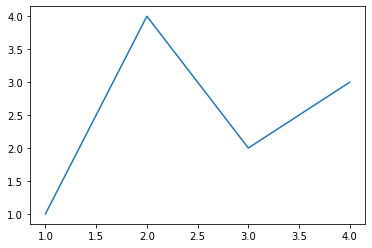

<Figure size 1800x720 with 0 Axes>

In [ ]:
figure, ax = plt.subplots()  # Create a figure containing a single axes.
ax.plot([1, 2, 3, 4], [1, 4, 2, 3]);  # Plot some data on the axes.
plt.figure(figsize=(25, 10))
plt.savefig("attachment.png")

In [ ]:
# create a model with technique, library, metrics and name
model = vectice.ModelRegister(name="Unit Sales Predictor", library="scikit-learn", technique="linear regression", metrics=metrics, attachments="attachment.png")

In [ ]:
# Automatically adds to step from above
# If no step is selected during session then it defaults to active iteration and currently active step
iter.model = model

2022/11/18 17:20:40 INFO vectice.models.iteration: Successfully registered Model(name='Unit Sales Predictor', id=153, version='Version 1').
2022/11/18 17:20:41 INFO vectice.models.iteration: Step with id: 105 successfully retrieved.
2022/11/18 17:20:41 INFO vectice.models.iteration: Successfully added Model(name='Unit Sales Predictor', id=153, version='Version 1') to Build Model


In [ ]:
step.close(message="RMSE= 0.67 and MAE= 0.56")
# you should be able to see the model in the ui, with the name, metrics, algorithm

2022/11/18 17:20:41 INFO vectice.models.step: Build Model was successfully closed.


##Assess Model

In [ ]:
# Get the currently active iteration
iter = Modeling.iteration

2022/11/18 17:31:22 INFO vectice.models.phase: Iteration with id: 32 successfully retrieved.


In [ ]:
# Get the Collect Initial Data step
step = iter.step("Assess model")

2022/11/18 17:31:25 INFO vectice.models.iteration: Step with id: 106 successfully retrieved.


In [ ]:
step.close(message="As expected the model performs better however this is not good enough and we should try a different method. We recommend doing a Random Forest as a new iteration")

2022/11/18 17:31:26 INFO vectice.models.step: Assess model was successfully closed.
